    Z-Score

In [1]:
import pandas as pd
from scipy.stats import zscore

In [4]:
df = pd.read_csv('weight-height.csv')
weight_mean = df['Weight'].mean()
weight_std = df['Weight'].std()
height_mean = df['Height'].mean()
height_std = df['Height'].std()

df['Weight_zscore'] = zscore(df['Weight'])
df['Height_zscore'] = zscore(df['Height'])

print(f'Mean of Weight: {weight_mean:.2f}')
print(f'Standard Deviation of Weight: {weight_std:.2f}')
print(f'Mean of Height: {height_mean:.2f}')
print(f'Standard Deviation of Height: {height_std:.2f}')

Mean of Weight: 161.44
Standard Deviation of Weight: 32.11
Mean of Height: 66.37
Standard Deviation of Height: 3.85


Outlier Analysis

In [43]:
zscore_threshold = 3

In [44]:
weight_outliers = df[df['Weight_zscore'].abs() > zscore_threshold]
height_outliers = df[df['Height_zscore'].abs() > zscore_threshold]
all_outliers = pd.concat([weight_outliers, height_outliers]).drop_duplicates()

print(f'\nNumber of Weight outliers (z-score > {zscore_threshold}): {len(weight_outliers)}')
print(f'Number of Height outliers (z-score > {zscore_threshold}): {len(height_outliers)}')
print(f'Total number of outliers found: {len(all_outliers)}')



Number of Weight outliers (z-score > 3): 2
Number of Height outliers (z-score > 3): 7
Total number of outliers found: 7


Plotting

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

Histplot

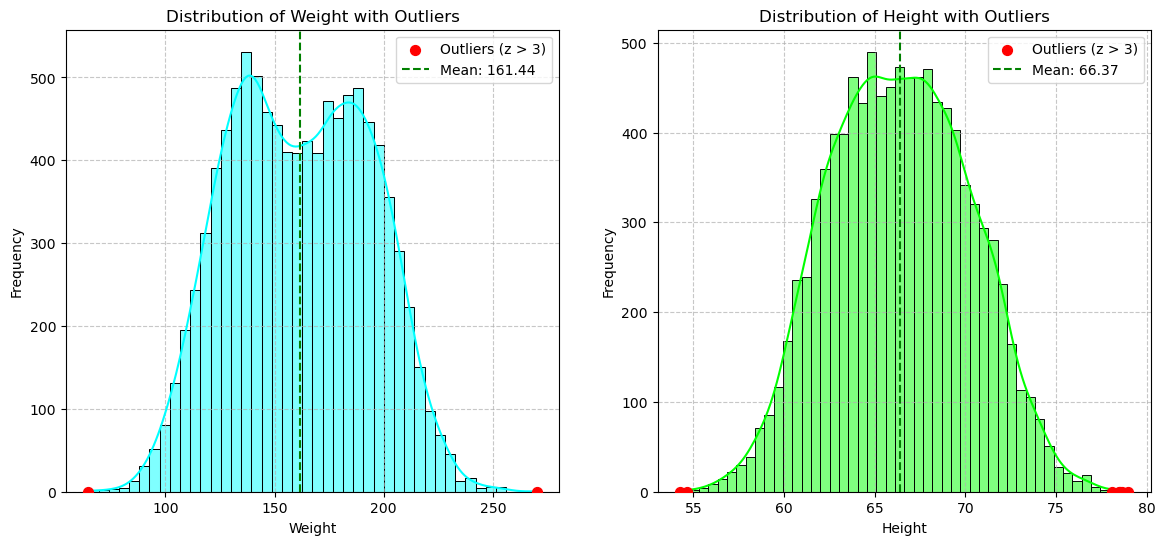

In [46]:
plt.figure(figsize=(14, 6))

#Plot for Weight
plt.subplot(1, 2, 1)            #1 row, 2 columns, 1st plot
sns.histplot(df['Weight'], kde=True, color='Cyan')
plt.scatter(weight_outliers['Weight'],[0] * len(weight_outliers), color='red', s=50, zorder=5,
 label=f'Outliers (z > {zscore_threshold})')    #plot outliers at y=0 for clarity
plt.axvline(weight_mean, color='g', linestyle='--', label=f'Mean: {weight_mean:.2f}')
plt.title('Distribution of Weight with Outliers')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

#Plot for Height
plt.subplot(1, 2, 2)            #1 row, 2 columns, 2nd plot
sns.histplot(df['Height'], kde=True, color='Lime')
plt.scatter(height_outliers['Height'],[0] * len(height_outliers), color='red', s=50, zorder=5,
 label=f'Outliers (z > {zscore_threshold})')    #plot outliers at y=0 for clarity
plt.axvline(height_mean, color='g', linestyle='--', label=f'Mean: {height_mean:.2f}')
plt.title('Distribution of Height with Outliers')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Scatter plot of Height vs Weight with outliers highlighted

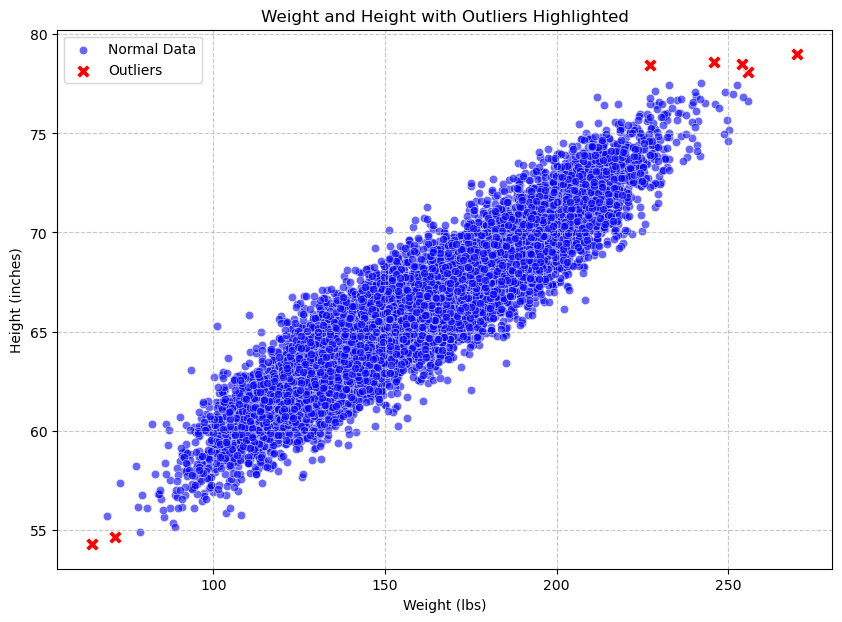

In [56]:
plt.figure(figsize=(10,7))

sns.scatterplot( x='Weight', y='Height', data=df, color='blue', alpha=0.6, label='Normal Data')
sns.scatterplot( x='Weight', y='Height', data=all_outliers, color='red', s=100, label='Outliers', marker='X')
plt.title('Weight and Height with Outliers Highlighted')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (inches)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

 Box Plot for Weight and Height

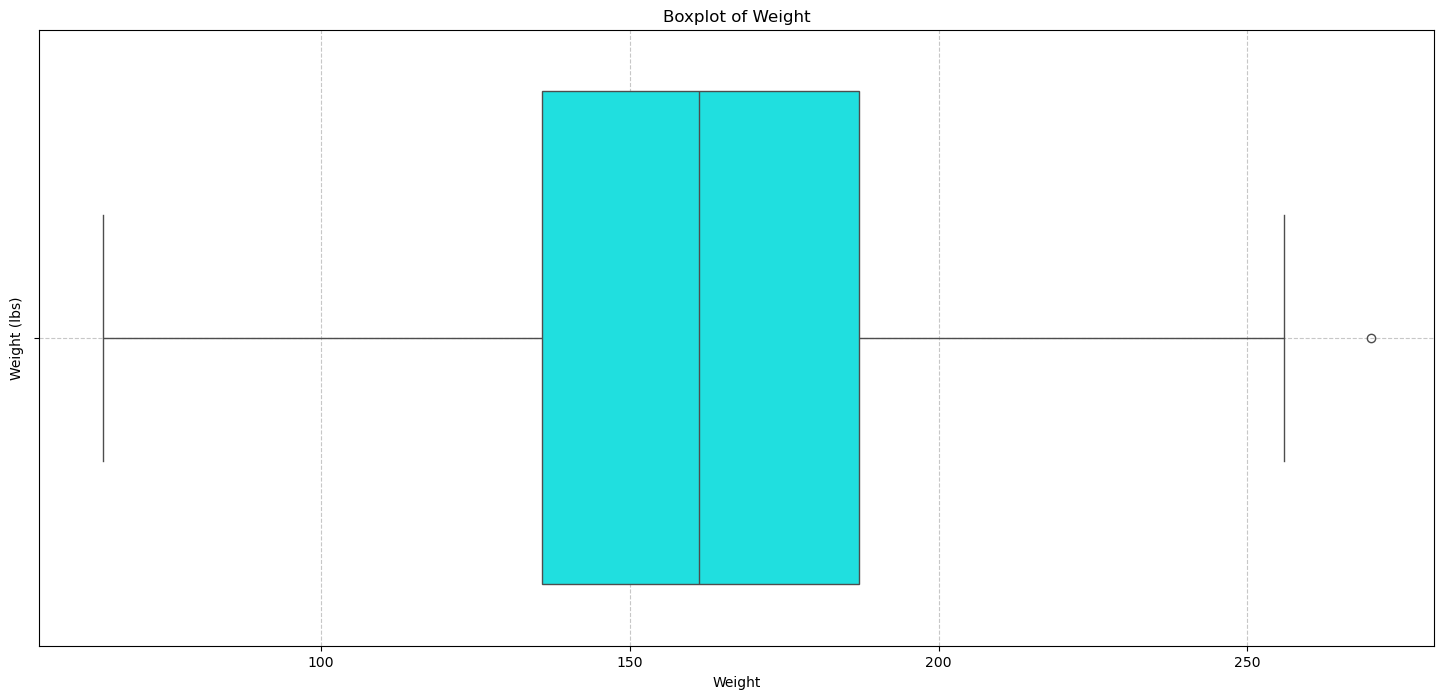

In [63]:
#for Weight
plt.figure(figsize=(18,8))
sns.boxplot(x=df['Weight'], color='cyan')
plt.title('Boxplot of Weight')
plt.ylabel('Weight (lbs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()